<a href="https://colab.research.google.com/github/shima2920/Kaggle/blob/main/Otto_Group_Product_Classification_Challenge_LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
#https://www.kaggle.com/general/74235

! pip install -q kaggle

from google.colab import files
files.upload()
#Kaggle account で発行した API token key ファイルを Upload する。

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets list

! kaggle competitions download -c otto-group-product-classification-challenge

Saving kaggle.json to kaggle (2).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              215KB  2021-03-08 07:43:38            133  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44            134  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            252  
nickuzmenkov/ranzcr-clip-kfold-tfrecords                    RANZCR CLiP KFold TFRecords                         2GB  2021-02-21 13:2

In [89]:
from tqdm import tqdm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder#Label Encoding
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
#import optuna.integration.lightgbm as lgb #LightLGBのハイパーパラメータチューニングモジュールであるOptunaをimport
import lightgbm as lgb_original
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import xgboost as XGBClassifier
from sklearn.model_selection import train_test_split

from keras.layers import Dense, Dropout #Dense : ニューラルネットの層を定義？
from keras.models import Sequential# 複雑なニューラルネットワークモデルを簡略化するためのモデルの一つであるSequentialモデル
from sklearn.preprocessing import StandardScaler #標準化



#Validation
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import KFold


#イテレータ, ループ処理を実行してくれる
import itertools

pd.set_option("display.max_rows", 10000)
pd.set_option('display.max_columns', 1000)
%matplotlib inline

In [90]:
train = pd.read_csv('train.csv.zip')
test = pd.read_csv('test.csv.zip')
sample = pd.read_csv('sampleSubmission.csv.zip')

# This is Kaggle Competition "Otto Group Product Classification Challenge"




https://www.kaggle.com/c/otto-group-product-classification-challenge


# Check train and test data

In [91]:
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,5,0,0,0,0,0,2,0,0,0,0,0,1,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,0,0,0,0,2,0,2,0,1,2,1,3,0,0,3,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1


In [92]:
test.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,3,2,1,0,0,0,0,0,0,0,5,3,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,2,0,4,0,4,0,0,0,0,2,0,0,0,8,0,0,0,0,0,0,0,0,2,0,4,0,4,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,6,8,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4,0,2,0,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,0,7,1,0,0,0,7,0,2,0,0,0,4,0,0,0,1,1,2,0,0,0,0,0,0,1,0,0,2,0,0,0,1,0,1,0,4,0,2,3,0,0,0,0,10,1,0,2,0,0,1,6,1,1,0,0,1,1,1,2,0,0,2,0,0,0,0,0,0,0,6,0,2,0,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,21,3,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,9,0,0,2,0,0,0,0,6,0,8,0,0,0,0,1,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,4,0,5,16,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9,0,0


In [93]:
sample.head()

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,1,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0


In [94]:
print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (61878, 95)
Testing Features shape:  (144368, 94)


In [95]:
from scipy import stats
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

resumetable(train)[:100]

Dataset Shape: (61878, 95)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,id,int64,0,61878,1,2,3,15.92
1,feat_1,int64,0,42,1,0,0,1.01
2,feat_2,int64,0,37,0,0,0,0.74
3,feat_3,int64,0,48,0,0,0,1.38
4,feat_4,int64,0,59,0,0,0,1.38
5,feat_5,int64,0,15,0,0,0,0.33
6,feat_6,int64,0,9,0,0,0,0.16
7,feat_7,int64,0,30,0,0,0,0.61
8,feat_8,int64,0,55,0,1,1,1.42
9,feat_9,int64,0,40,0,0,0,1.32


In [96]:
train.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906,1.252869,0.140874,0.480979,1.696693,1.284398,1.413459,0.366108,0.575423,0.551699,0.471525,0.204014,0.729969,0.142522,2.643880,1.534520,0.563108,0.696613,0.238970,0.275768,0.150312,0.148680,1.043796,0.696516,0.946411,0.666263,0.709089,0.263632,0.582129,0.485585,1.653059,0.303468,0.698019,0.451146,0.560829,0.238130,0.641375,0.249669,1.584893,0.348314,0.324283,0.053298,0.213485,0.442063,2.072465,0.323120,0.303775,0.309108,0.697970,0.388603,1.029930,0.239746,1.187563,0.168590,1.256796,0.222228,0.571706,2.897653,0.392902,0.811128,0.892789,0.319290,0.858722,0.591050,0.579851,0.726817,0.748457,0.124196,0.366415,0.300446,0.698067,0.078461,0.187983,0.496719,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,1.083340,3.042333,0.567089,2.014697,3.163212,3.862236,2.226163,1.477436,1.335985,4.636145,1.438727,0.696050,1.446220,0.782979,4.629015,2.332994,1.710305,2.873222,0.828112,1.901294,1.640880,0.897354,2.416849,1.310202,3.368622,3.197965,2.555119,0.756934,1.602579,3.298315,3.299798,1.085672,1.961189,1.706013,1.346090,2.587131,2.348359,1.446203,2.577071,1.369380,1.720470,0.513820,1.044788,2.006485,4.113319,0.998743,1.925806,1.082148,3.983722,2.577693,3.028469,1.017553,2.666742,0.946158,3.402080,0.783052,1.361874,4.974322,1.761054,4.111091,1.941368,1.162443,2.411646,5.783233,3.757822,3.200095,2.920038,0.906621,2.778317,1.285569,2.245671,0.461244,0.836269,2.434921,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [97]:
train['target'].value_counts()

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

Need to convert the categorical value to numerical value on target.

In [98]:
train['target'] = train['target'].map({'Class_1':0,'Class_2':1,'Class_3':2,'Class_4':3,'Class_5':4,'Class_6':5,'Class_7':6,'Class_8':7,'Class_9':8})

In [99]:
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,5,0,0,0,0,0,2,0,0,0,0,0,1,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,0,0,0,0,2,0,2,0,1,2,1,3,0,0,3,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0


We can remove id column.

In [100]:
train = train.drop(['id'], axis = 1)

# EDA

In [101]:
# Find correlations with the target and sort
correlations = train.corr()['target'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(25))
print('\nMost Negative Correlations:\n', correlations.head(25))
'''
#correlation matrix
plt.figure(figsize=(45,25))
k = len(train.columns) #number of variables for heatmap
corrmat = train.corr()
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
'''

Most Positive Correlations:
 feat_83    0.165828
feat_55    0.168101
feat_79    0.170379
feat_58    0.174418
feat_54    0.183475
feat_66    0.183488
feat_11    0.189551
feat_68    0.190042
feat_2     0.191739
feat_13    0.194200
feat_62    0.194831
feat_90    0.195439
feat_76    0.199383
feat_67    0.199869
feat_38    0.199895
feat_22    0.200545
feat_18    0.200805
feat_41    0.205505
feat_75    0.206344
feat_8     0.209725
feat_69    0.217790
feat_20    0.219909
feat_36    0.226549
feat_24    0.226936
target     1.000000
Name: target, dtype: float64

Most Negative Correlations:
 feat_14   -0.365092
feat_40   -0.330114
feat_25   -0.294079
feat_15   -0.259047
feat_88   -0.240481
feat_72   -0.208646
feat_33   -0.179347
feat_9    -0.175350
feat_64   -0.139826
feat_43   -0.122226
feat_86   -0.115179
feat_85   -0.102359
feat_48   -0.081443
feat_16   -0.004812
feat_84   -0.003308
feat_21    0.013486
feat_32    0.015677
feat_30    0.018937
feat_34    0.018999
feat_56    0.028301
feat_70    0

"\n#correlation matrix\nplt.figure(figsize=(45,25))\nk = len(train.columns) #number of variables for heatmap\ncorrmat = train.corr()\ncols = corrmat.nlargest(k, 'target')['target'].index\ncm = np.corrcoef(train[cols].values.T)\nsns.set(font_scale=1.25)\nhm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)\nplt.show()\n"

screening only the variables with high correlation with target value.

Top 15 variables with Positive?Negative Correlations 

In [102]:
#train = train[['feat_62', 'feat_90', 'feat_76', 'feat_67', 'feat_38', 'feat_22', 'feat_18', 'feat_41', 'feat_75', 'feat_8', 'feat_69', 'feat_20', 'feat_36', 'feat_24', 'feat_14', 'feat_40', 'feat_25', 'feat_15', 'feat_88', 'feat_72', 'feat_33', 'feat_9', 'feat_64', 'feat_43', 'feat_86', 'feat_85', 'feat_48', 'feat_16', 'feat_84', 'target']]

In [103]:
#test = test[['feat_62', 'feat_90', 'feat_76', 'feat_67', 'feat_38', 'feat_22', 'feat_18', 'feat_41', 'feat_75', 'feat_8', 'feat_69', 'feat_20', 'feat_36', 'feat_24', 'feat_14', 'feat_40', 'feat_25', 'feat_15', 'feat_88', 'feat_72', 'feat_33', 'feat_9', 'feat_64', 'feat_43', 'feat_86', 'feat_85', 'feat_48', 'feat_16', 'feat_84']]

Top 25 variables with Positive?Negative Correlations 

In [104]:
train = train[['feat_83', 'feat_55', 'feat_79', 'feat_58', 'feat_54', 'feat_66', 'feat_11', 'feat_68', 'feat_2', 'feat_13', 'feat_62', 'feat_90', 'feat_76', 'feat_67', 'feat_38', 'feat_22', 'feat_18', 'feat_41', 'feat_75', 'feat_8', 'feat_69', 'feat_20', 'feat_36', 'feat_24', 'target', 'feat_14', 'feat_40', 'feat_25', 'feat_15', 'feat_88', 'feat_72', 'feat_33', 'feat_9', 'feat_64', 'feat_43', 'feat_86', 'feat_85', 'feat_48', 'feat_16', 'feat_84', 'feat_21', 'feat_32', 'feat_30', 'feat_34', 'feat_56', 'feat_70', 'feat_5', 'feat_6', 'feat_93', 'feat_77']]

In [105]:
test = test[['feat_83', 'feat_55', 'feat_79', 'feat_58', 'feat_54', 'feat_66', 'feat_11', 'feat_68', 'feat_2', 'feat_13', 'feat_62', 'feat_90', 'feat_76', 'feat_67', 'feat_38', 'feat_22', 'feat_18', 'feat_41', 'feat_75', 'feat_8', 'feat_69', 'feat_20', 'feat_36', 'feat_24', 'feat_14', 'feat_40', 'feat_25', 'feat_15', 'feat_88', 'feat_72', 'feat_33', 'feat_9', 'feat_64', 'feat_43', 'feat_86', 'feat_85', 'feat_48', 'feat_16', 'feat_84', 'feat_21', 'feat_32', 'feat_30', 'feat_34', 'feat_56', 'feat_70', 'feat_5', 'feat_6', 'feat_93', 'feat_77']]

In [106]:
train.head()

,feat_83,feat_55,feat_79,feat_58,feat_54,feat_66,feat_11,feat_68,feat_2,feat_13,feat_62,feat_90,feat_76,feat_67,feat_38,feat_22,feat_18,feat_41,feat_75,feat_8,feat_69,feat_20,feat_36,feat_24,target,feat_14,feat_40,feat_25,feat_15,feat_88,feat_72,feat_33,feat_9,feat_64,feat_43,feat_86,feat_85,feat_48,feat_16,feat_84,feat_21,feat_32,feat_30,feat_34,feat_56,feat_70,feat_5,feat_6,feat_93,feat_77
0,0,0,2,0,1,0,1,0,0,0,1,0,0,7,0,1,0,0,0,0,0,0,0,4,0,0,1,1,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0
3,0,1,1,0,3,1,1,0,0,1,0,0,1,5,3,0,0,0,0,0,0,0,0,7,0,0,0,2,0,0,0,0,0,0,0,1,0,1,1,22,0,10,58,0,0,4,6,1,0,0
4,0,0,4,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
train.shape

(61878, 50)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


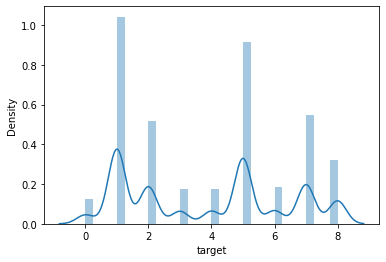

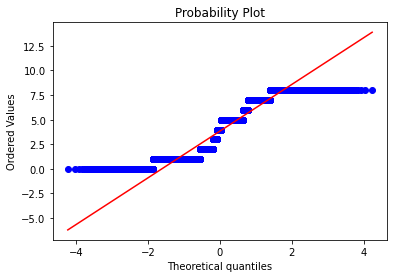

In [108]:
#ヒストグラム表示(正規分布込)み
from scipy import stats
#histogram and normal probability plot
var = 'target'
sns.distplot(train[var]);
fig = plt.figure()
res = stats.probplot(train[var], plot=plt)

# Preprocessing

# Split target and others value.

In [109]:
#目的関数、説明変数に分類(drop the columns)
x_train = train.drop(['target'], axis = 1)
y_train = train['target']

# LightGBM Classifier

ref: https://www.kaggle.com/nagomiso/predict-with-lightgbm-optuna

In [110]:
# Train/validation用にデータ分割
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

#LightGBM用のデータ作成
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_valid = lgb.Dataset(X_test, Y_test, reference=lgb_train)

# to record eval results for plotting
evals_result = {} 

In [111]:
#OptunaチューニングParam
optuna_params = {
    'task': 'train',
    #'boosting_type': 'gbdt',
    'objective': 'multiclass',# regression(回帰), binary(二値分類, ラベルは0,1),multiclass(多クラス分類, metricとしては、multi_logloss, multi_error(正答率))
    'metric': "multi_logloss", #regression : 絶対値誤差関数(L1)ならばmae, 2乗誤差関数(L2)ならばmseと指定, rmse
                      #binary : binary_logloss(クロスエントロピー)とbinary_error(正答率)の2つ
                      #multiclass : multi_logloss(softmax関数)とmulti_error(正答率)の2つ
                 
    'num_class': 9,
    #'num_leaves': 20,#木にある分岐の個数．デフォルトは31, 大きくすると精度は上がるが過学習が進む
    #'max_depth': 10,#木構造の深さを限定するための変数．データが少ないときに過学習を防ぐために設定する．デフォルト値は-1で0以下の値は制限なしを意味する．
    #'learning_rate': 0.05,#学習率。デフォルトは0.1
    #'feature_fraction': 0.9,#学習の高速化と過学習の抑制に使用される．データの特徴量のfeature_fraction * 100 % だけ使用する．
    #'min_data_in_leaf':4,#大きくすることでデータと分岐が1対1対応することを防ぎ，結果として過学習を抑制する．
    #'verbose':50
}

In [112]:
best_params, tuning_history = dict(), list()
#Optunaを用いて最適化し、LGBにTrainさせる
model = lgb.train(optuna_params,
                  lgb_train,
                  valid_sets=lgb_valid,
                  verbose_eval=0,
                  #best_params=best_params,
                  num_boost_round=1000,
                  early_stopping_rounds=5,
                  #tuning_history=tuning_history
                  )

In [113]:
y_pred_test = model.predict(X_test, num_iteration=model.best_iteration)

In [114]:
score = log_loss(Y_test, y_pred_test)
print(f"logloss: {score}")

logloss: 0.5845641289539494


In [115]:
y_pred = model.predict(test, num_iteration=model.best_iteration)

In [116]:
y_pred

array([[4.16667970e-04, 3.02394417e-01, 5.93153752e-01, ...,
        2.08340867e-02, 3.86549761e-04, 9.91840900e-05],
       [1.23548610e-03, 5.68760071e-02, 3.41422820e-03, ...,
        3.45695675e-03, 2.20655974e-01, 1.36488035e-04],
       [8.79277685e-06, 4.99753438e-05, 7.07181021e-06, ...,
        8.95466903e-05, 1.41407093e-03, 3.05359096e-05],
       ...,
       [2.10647301e-04, 2.37064310e-01, 7.21669940e-01, ...,
        4.05507329e-04, 3.39885342e-05, 1.10731026e-05],
       [9.78855931e-05, 2.13034444e-01, 2.35655292e-02, ...,
        9.24893377e-04, 1.54883138e-05, 4.16828275e-06],
       [1.80884991e-04, 4.78286190e-01, 3.48772818e-01, ...,
        7.46949232e-03, 9.45391810e-05, 5.43190539e-05]])

In [117]:
y_pred.shape

(144368, 9)


Calculate feature importances...
Feature importances: [1647, 1399, 1448, 966, 2759, 1781, 1709, 1640, 550, 1491, 2999, 1168, 1830, 4828, 1583, 1648, 1706, 1263, 2309, 2177, 1187, 1417, 1979, 4579, 3200, 3607, 3474, 2879, 2589, 2015, 2039, 2390, 3009, 2451, 3526, 1959, 3878, 2675, 449, 834, 2484, 776, 3073, 1351, 2234, 647, 287, 727, 744]
Plot feature importances...


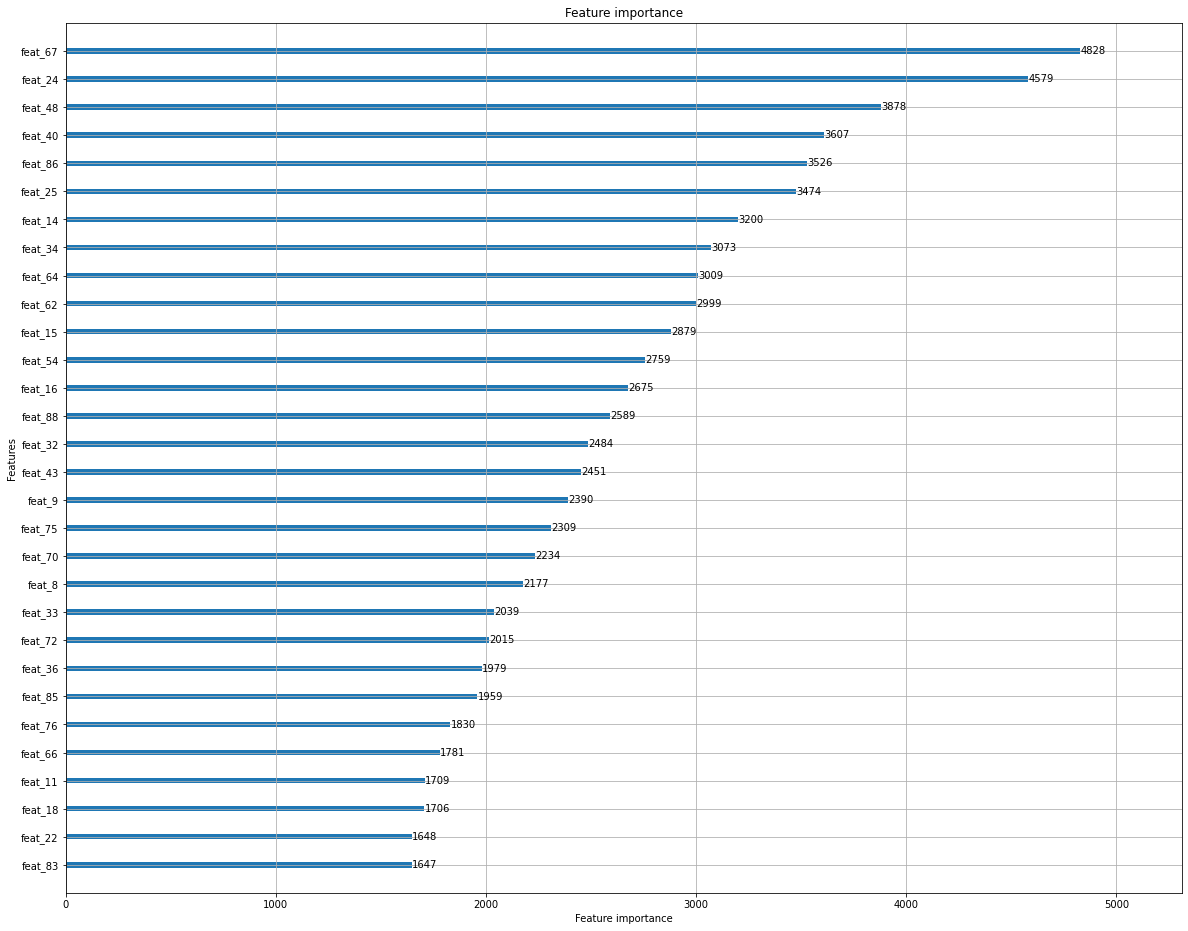

In [122]:
print('\nCalculate feature importances...')

# feature importances
print('Feature importances:', list(model.feature_importance()))

#print('Plot metrics during training...')
#ax = lgb.plot_metric(evals_result, metric='l2')
#plt.show()

print('Plot feature importances...')
fig, ax = plt.subplots(figsize=(20,16))
ax = lgb.plot_importance(model, max_num_features=30, ax=ax)
plt.show()

# Submit

In [118]:
y_pred = pd.DataFrame(y_pred, index=sample.id.values, columns=sample.columns[1:])

In [119]:
y_pred.to_csv('submission_yshimamu.csv', index_label='id')

In [120]:
y_pred

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
1,0.000417,0.302394,0.593154,0.082526,1.569468e-07,0.000190,0.020834,0.000387,0.000099
2,0.001235,0.056876,0.003414,0.000430,2.221243e-05,0.713773,0.003457,0.220656,0.000136
3,0.000009,0.000050,0.000007,0.000012,4.648664e-09,0.998388,0.000090,0.001414,0.000031
4,0.000059,0.516883,0.442147,0.038655,7.082493e-08,0.000064,0.000043,0.000131,0.002019
5,0.092268,0.000066,0.000043,0.000019,3.550885e-07,0.000375,0.000316,0.252712,0.654200
...,...,...,...,...,...,...,...,...,...
144364,0.206121,0.011082,0.004766,0.007835,2.131251e-06,0.448308,0.030513,0.070329,0.221044
144365,0.000325,0.354196,0.561384,0.058166,9.112054e-08,0.000632,0.025078,0.000119,0.000099
144366,0.000211,0.237064,0.721670,0.040524,1.280822e-08,0.000081,0.000406,0.000034,0.000011
144367,0.000098,0.213034,0.023566,0.762257,4.884056e-08,0.000101,0.000925,0.000015,0.000004


In [121]:
!kaggle competitions submit otto-group-product-classification-challenge -f submission_yshimamu.csv -m "First commit"

100% 27.3M/27.3M [00:00<00:00, 55.5MB/s]
Successfully submitted to Otto Group Product Classification Challenge